In [7]:
import requests 

def request_to_server(image_path):
    url = "http://127.0.0.1:8000/whatis/"

    with open(image_path, "rb") as f:
        files = {"file": (image_path, f, "image/png")}
        response = requests.post(url, files=files)
        
    print("Server response:", response.json())

In [2]:
from datasets import load_dataset
from PIL import Image
import os
## Carga del dataset
tiny_imagenet = load_dataset('Maysee/tiny-imagenet')

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
os.mkdir("samples")

In [4]:
imgIndex = 0
images = []
SIZE = 10
seen_labels = set()
for i in range(0, 10000, 20):
    if tiny_imagenet['train'][i]["label"] not in seen_labels:
        images.append(i)
        seen_labels.add(tiny_imagenet['train'][i]["label"])
        sample_image=tiny_imagenet['train'][i]['image']
        sample_image.save(f"samples/sample{imgIndex}.png", format="PNG")
        imgIndex += 1
    if imgIndex == SIZE:
        break

In [16]:
def send_image(image):
    """Envía una imagen PIL al servidor Ray Serve usando POST multipart"""
    buffer = io.BytesIO()
    image.save(buffer, format="PNG")
    buffer.seek(0)
    
    response = requests.post(
        "http://127.0.0.1:8000/whatis",
        files={"file": ("image.png", buffer, "image/png")}
    )
    
    return response.json()


In [ ]:
import io

# Rango de imágenes a utilizar, como en el ejercicio 1
indices = range(0, 10000, 40)
# Cargar dataset tiny-imagenet desde Hugging Face
dataset = load_dataset("Maysee/tiny-imagenet")["train"]

# Enviar un subconjunto (ej: 5 primeras imágenes) y mostrar respuestas
results = []
for i in indices[:5]:
    img = dataset[i]["image"]
    result = send_image(img)
    results.append((i, result))
    
    print(f"Imagen {i}: {result}")

Imagen 0: {'prediction': 'unknown'}
Imagen 40: {'prediction': 'unknown'}
Imagen 80: {'prediction': 'goldfish', 'wikipedia info': 'The goldfish (Carassius auratus) is a freshwater fish in the family Cyprinidae of order Cypriniformes. It is commonly kept as a pet in indoor aquariums, and is one of the most popular aquarium fish. Goldfish released into the wild have become an invasive pest in parts of North America and Australia.\nNative to China, the goldfish is a relatively small member of the carp family (which also includes the Prussian carp and the crucian carp). It was first selectively bred for color in imperial China m'}
Imagen 120: {'prediction': 'goldfish', 'wikipedia info': 'The goldfish (Carassius auratus) is a freshwater fish in the family Cyprinidae of order Cypriniformes. It is commonly kept as a pet in indoor aquariums, and is one of the most popular aquarium fish. Goldfish released into the wild have become an invasive pest in parts of North America and Australia.\nNative

Server response: {'prediction': 'unknown'}
None


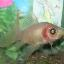

In [8]:
send_and_show_image(0)

Server response: {'prediction': 'unknown'}
None


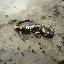

In [9]:
send_and_show_image(1)

Server response: {'prediction': 'unknown'}
None


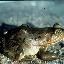

In [10]:
send_and_show_image(2)

Server response: {'prediction': 'tailed frog', 'wikipedia info': 'The tailed frogs are two species of frogs in the genus Ascaphus, the only taxon in the family Ascaphidae . The "tail" in the name is actually an extension of the male cloaca. The tail is one of two distinctive anatomical features adapting the species to life in fast-flowing streams.  These are the only North American frog species that reproduce by internal fertilization. They are among the most primitive known families of frogs.\nIts scientific name means \'without a spade\', from the privative pre'}
None


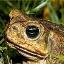

In [11]:
send_and_show_image(3)

Server response: {'prediction': 'American alligator', 'wikipedia info': 'The American alligator (Alligator mississippiensis), sometimes referred to as a gator, or common alligator is a large crocodilian reptile native to the Southeastern United States. It is one of the two extant species in the genus Alligator, and is larger than the only other living alligator species, the Chinese alligator.\nAdult male American alligators measure 3.4 to 6 m (11.2 to 19.7 ft) in length, and can weigh up to 500 kg (1,100 lb), with unverified sizes of up to 7 m (23.0 ft) and weights of'}
None


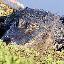

In [12]:
send_and_show_image(4)

Server response: {'prediction': 'unknown'}
None


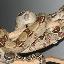

In [13]:
send_and_show_image(5)

Server response: {'prediction': 'trilobite', 'wikipedia info': 'Trilobites (; meaning "three-lobed entities") are extinct marine arthropods that form the class Trilobita. One of the earliest groups of arthropods to appear in the fossil record, trilobites were among the most successful of all early animals, existing in oceans for almost 270 million years, with over 22,000 species having been described. Because trilobites had wide diversity and an easily fossilized mineralised exoskeleton made of calcite, they left an extensive fossil record. The study of thei'}
None


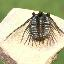

In [14]:
send_and_show_image(6)

Server response: {'prediction': 'black widow', 'wikipedia info': 'No pages found'}
None


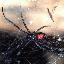

In [93]:
send_and_show_image(8)

Server response: {'prediction': 'unknown'}
None


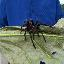

In [94]:
send_and_show_image(9)